In [1]:
cd /orange/adamginsburg/salt/orion

/orange/adamginsburg/salt/orion


In [2]:
from spectral_cube import SpectralCube

In [3]:
from astropy import units as u

In [4]:
cube = SpectralCube.read('/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw1_lines_cutout.fits')
cube

VaryingResolutionSpectralCube with shape=(1920, 1250, 1250) and unit=Jy / beam:
 n_x:   1250  type_x: RA---SIN  unit_x: deg    range:    83.809793 deg:   83.811187 deg
 n_y:   1250  type_y: DEC--SIN  unit_y: deg    range:    -5.375852 deg:   -5.374464 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 231834857246.900 Hz:233708832546.243 Hz

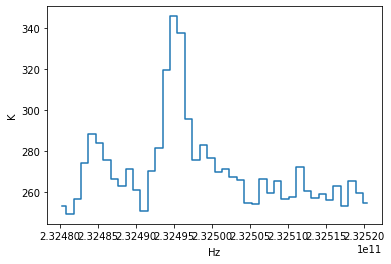

In [5]:
cube.spectral_slab(232.48*u.GHz, 232.52*u.GHz)[:, 640, 650].to(u.K).quicklook()

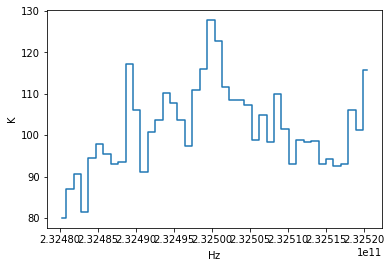

In [6]:
cube.spectral_slab(232.48*u.GHz, 232.52*u.GHz)[:, 660, 640].to(u.K).quicklook()

In [ ]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['image.origin'] = 'lower'
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

In [8]:
from astropy.table import Table
from astropy import table

In [9]:
import pprint

In [10]:
import scipy, scipy.ndimage

In [11]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

In [12]:
import regions
from astropy import units as u, coordinates
cen = coordinates.SkyCoord(83.810486281, -5.37517214, unit=(u.deg, u.deg), frame='icrs')
reg = regions.Regions([regions.RectangleSkyRegion(cen, 0.53*u.arcsec, 0.34*u.arcsec, 52*u.deg)])
#    box(83.810486281, -5.375172145, 0.3368", 0.5281", 322.67123) # color=#2EE6D6 width=2

#reg2 = regions.Regions.read('cutout2.reg')
#reg3 = regions.Regions.read('cutout3.reg')
#regvsm = regions.Regions.read('verysmall.reg')
#regvvsm = regions.Regions.read('innerdiskbox.reg')

# NaCl Stackl

In [13]:
from spectral_cube.analysis_utilities import stack_cube

In [14]:
nacltables = salt_tables[3:5]
#nacltables[0]

In [97]:
nacltables[0][nacltables[0]['Freq'] > 230*u.GHz]

Iso,Ju,Jl,vu,vl,nuCalc,e_nuCalc,x_nuCalc,E_U,Aij,Freq,gu,gl,E_L,QNs,Species
,,,,,,,,K,1 / s,GHz,,,,,
str2,int16,int16,uint8,uint8,float64,float64,str9,float64,float32,float64,int16,int16,float64,str15,str24
35,18,17,2,2,230779.16700,0.004000,MHz,1139.50,0.006,230.77917,592,560,1128.4243468129803,v=2-2 J=18-17,23Na-35Clv=2-2 J=18-17
35,18,17,1,1,232509.97700,0.004000,MHz,625.70,0.006,232.50998,592,560,614.5412810339421,v=1-1 J=18-17,23Na-35Clv=1-1 J=18-17
35,19,18,8,8,232859.04400,0.040000,MHz,4130.70,0.007,232.85904,624,592,4119.524528460123,v=8-8 J=19-18,23Na-35Clv=8-8 J=19-18
35,18,17,0,0,234251.91200,0.005000,MHz,106.90,0.006,234.25191,592,560,95.65768133911207,v=0-0 J=18-17,23Na-35Clv=0-0 J=18-17
35,19,18,7,7,234615.57500,0.024000,MHz,3646.10,0.007,234.61558,624,592,3634.840228267774,v=7-7 J=19-18,23Na-35Clv=7-7 J=19-18
35,19,18,6,6,236383.82400,0.013000,MHz,3156.80,0.007,236.38382,624,592,3145.455365700122,v=6-6 J=19-18,23Na-35Clv=6-6 J=19-18
35,19,18,5,5,238163.79500,0.008000,MHz,2662.70,0.007,238.16380,624,592,2651.269940565196,v=5-5 J=19-18,23Na-35Clv=5-5 J=19-18
35,19,18,4,4,239955.49200,0.005000,MHz,2163.80,0.007,239.95549,624,592,2152.283952671028,v=4-4 J=19-18,23Na-35Clv=4-4 J=19-18


In [15]:
import spectral_cube.analysis_utilities
import imp
imp.reload(spectral_cube.analysis_utilities)
from spectral_cube.analysis_utilities import stack_cube

In [16]:
flist = (glob.glob('/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw*_lines_cutout.fits'))

In [17]:
flist

['/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw1_lines_cutout.fits',
 '/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw0_lines_cutout.fits',
 '/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw2_lines_cutout.fits',
 '/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw3_lines_cutout.fits']

In [18]:
#from dask.diagnostics import ProgressBar
#pbar = ProgressBar()
#pbar.register()

import dask
dask.config.set(scheduler='threads', num_workers=8)

In [19]:
import radio_beam
from astropy.io import fits

In [20]:
# somehow the cubes aren't on the same grid, so we're using the header from the first one as our target...
target_header_ = fits.getheader('/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw0_lines_cutout_smaller.fits')
target_wcs = wcs.WCS(target_header_).celestial

In [21]:
for fn in flist:
    for rr,regn in ( (reg, ''), ):
        outfile = fn.replace("_cutout",f"_cutout_smaller")
        if not os.path.exists(outfile) or not hasattr(SpectralCube.read(outfile), 'beam'):
            print(fn, outfile)
            cube = SpectralCube.read(fn, use_dask=False).subcube_from_regions(rr)
            cube.allow_huge_operations=True
            #with cube.use_dask_scheduler('threads', num_workers=8):
            if hasattr(cube, 'beams'):
                cb = cube.beams.common_beam(max_iter=20, max_epsilon=0.01)
                scube = cube.convolve_to(cb)
            elif hasattr(cube, '_beam') and cube._beam is not None:
                scube = cube
            else:
                # HACK - borrowed from spw1
                beam = radio_beam.Beam(1.63565586424536E-05*u.deg, 1.29339637027846E-05*u.deg, -86.05075073242188*u.deg)
                cube._beam = beam
                cube.meta['beam'] = beam
                scube = cube
            assert hasattr(scube, 'beam')
            assert scube._beam is not None
            scube.to(u.K)
            target_header = cube.header
            target_header.update(target_wcs.celestial.to_header())
            target_header['NAXIS1'] = 148
            target_header['NAXIS2'] = 156
            assert target_header['NAXIS1'] == 148
            assert target_header['NAXIS2'] == 156
            rcube = scube.reproject(target_header)
            assert rcube.beam is not None
            
            rcube.write(outfile, overwrite=True)
        rslt = SpectralCube.read(outfile)
        assert rslt.shape == (1920, 156, 148)
        assert rslt.beam is not None

In [37]:
#SpectralCube.read('/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw2_lines_cutout_smaller.fits').beam

Beam: BMAJ=0.05888361111283296 arcsec BMIN=0.04656226933002456 arcsec BPA=-86.05075073242188 deg

In [39]:
regn = "co1"
# spw3 has a huge, ill-behaved beam
cbflist = (glob.glob('/orange/adamginsburg/orion/2016.1.00165.S/external/full_OrionSourceI_B6_spw[012]_lines_cutout_smaller.fits'))
# don't need to subcube b/c reg = cutout = co1
cubes = [SpectralCube.read(fn, use_dask=True)#.subcube_from_regions(reg3)
         for fn in cbflist]
for ii,cube in enumerate(cubes):
    # continuum subtract
    with cube.use_dask_scheduler('threads', num_workers=8):
        cube.allow_huge_operations = True
        cubes[ii] = cube - cube.percentile(25, axis=0)
cubes

[DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
  n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
  n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:   -5.375086 deg
  n_s:   1920  type_s: FREQ      unit_s: Hz     range: 231834857246.900 Hz:233708832546.243 Hz,
 DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
  n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
  n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:   -5.375086 deg
  n_s:   1920  type_s: FREQ      unit_s: Hz     range: 214277229834.040 Hz:216151205133.500 Hz,
 DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
  n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
  n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:

In [40]:
# only needed for VRSCs
if hasattr(cubes[0], 'beams'):
    beams = radio_beam.Beams(beams=[cube.beams.common_beam(max_iter=20, max_epsilon=0.01) for cube in cubes])
    cb=beams.common_beam()
else:
    beams = radio_beam.Beams(beams=[cube.beam for cube in cubes])
    cb=beams.common_beam()
print(f"Common beam: {cb}")
cb

Common beam: 7.568477423720347e-14 sr


Beam: BMAJ=0.059689987450837916 arcsec BMIN=0.04760941863059964 arcsec BPA=-86.51175689697266 deg

In [41]:
linelist = np.concatenate([data['Freq'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)].quantity
                             for data in nacltables])
linenames = np.concatenate( [data['Species'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)]
                             for data in nacltables] )
(linelist, linenames)

(<Quantity [230.779167, 232.509977, 214.938711, 229.246046] GHz>,
 array(['23Na-35Clv=2-2 J=18-17', '23Na-35Clv=1-1 J=18-17',
        '23Na-37Clv=1-1 J=17-16', '23Na-37Clv=0-0 J=18-17'], dtype='<U24'))

In [42]:
vcen = 5 * u.km/u.s

In [43]:
from astropy import log
log.setLevel('INFO')

In [44]:
cubes

[DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
  n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
  n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:   -5.375086 deg
  n_s:   1920  type_s: FREQ      unit_s: Hz     range: 231834857246.900 Hz:233708832546.243 Hz,
 DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
  n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
  n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:   -5.375086 deg
  n_s:   1920  type_s: FREQ      unit_s: Hz     range: 214277229834.040 Hz:216151205133.500 Hz,
 DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
  n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
  n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:

In [46]:
#log.setLevel('DEBUG')
stack, cutouts = stack_cube([c.to(u.K) for c in cubes],
                   linelist=linelist,
                   vmin=vcen-30*u.km/u.s,
                   vmax=vcen+30*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
#log.setLevel('INFO')
#stackK = stack.to(u.K)
stack.write('/orange/adamginsburg/orion/2016.1.00165.S/SrcI_NaCl_v_le_3_stackcube.fits', overwrite=True)
stack.write('/orange/adamginsburg/salt/orion/SrcI_NaCl_v_le_3_stackcube.fits', overwrite=True)

Mean of empty slice


In [ ]:
list(zip(cubes, cbflist))

All-NaN slice encountered
invalid value encountered in true_divide


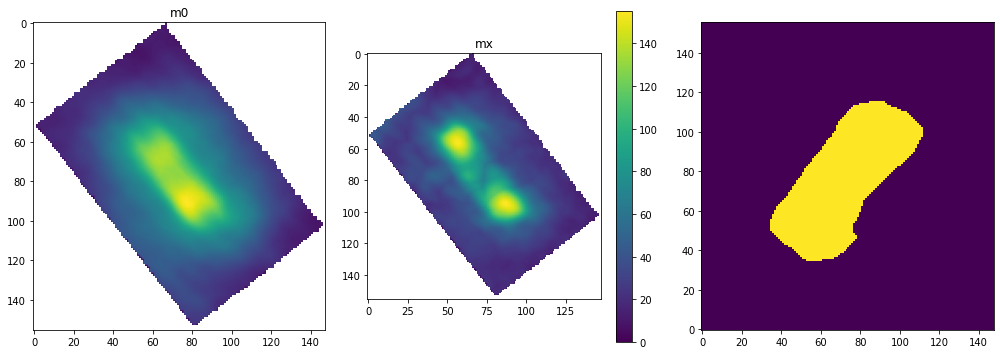

<Figure size 432x288 with 0 Axes>

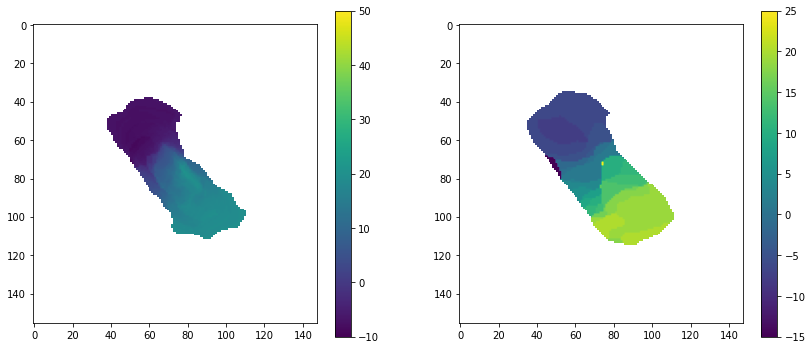

In [47]:
stackc = stack
stackc = stackc.subcube_from_regions(reg)
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = stackc.moment0()
m0.quicklook(use_aplpy=False)
pl.title("m0")

pl.subplot(1,3,2)
mx = stackc.max(axis=0)
mx.quicklook(use_aplpy=False)
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 60*u.K
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=7)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


m1 = stackc.with_mask(msk).with_mask(stackc > 50*u.K).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10, vmax=50)
pl.colorbar(mappable=im)
mxv = stackc.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-15, vmax=25)
pl.colorbar()


vmap = mxv.hdu
mxv.write('/orange/adamginsburg/salt/orion/NaCl_v_le_3_vmap.fits', overwrite=True)

In [48]:
if not os.path.exists('spectra'):
    os.mkdir('spectra')
    os.mkdir('spectra/figures')

DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
 n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
 n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:   -5.375086 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 231834857246.900 Hz:233708832546.243 Hz


Mean spectrum
Stacking
DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
 n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
 n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:   -5.375086 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 214277229834.040 Hz:216151205133.500 Hz


Mean spectrum
Stacking
DaskSpectralCube with shape=(1920, 156, 148) and unit=Jy / beam and chunk size (640, 156, 148):
 n_x:    148  type_x: RA---SIN  unit_x: deg    range:    83.810404 deg:   83.810569 deg
 n_y:    156  type_y: DEC--SIN  unit_y: deg    range:    -5.375258 deg:   -5.375086 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 229167925754.100 Hz:231041901053.560 Hz


Mean spectrum
Stacking


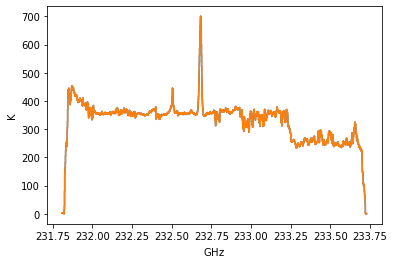

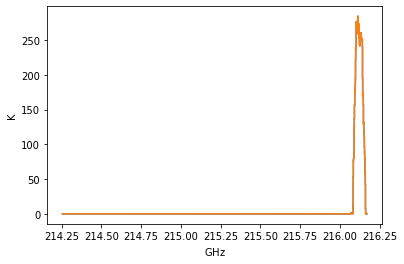

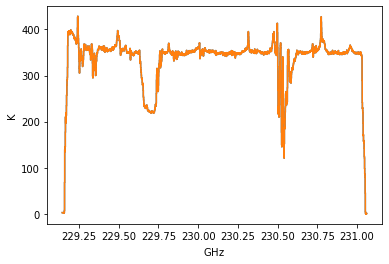

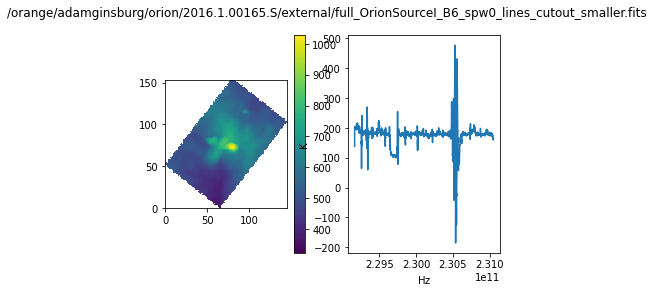

In [50]:
import glob
import spectral_cube.analysis_utilities
import reproject
from tqdm.notebook import tqdm

for fn in cbflist:
    basename = os.path.split(fn)[-1].split(".fits")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True)
    except Exception as ex:
        print(ex)
        continue
    print(cube)
    scube = cube.subcube_from_regions(reg).to(u.K)
    mx = scube.max(axis=0)
    #msk = mx > 0.003*mx.unit
    print("Mean spectrum")
    sp = scube.mean(axis=(1,2))
    
    sp.write(f'spectra/{fn.split("/")[-1].replace(".fits","_meanspec.fits")}', overwrite=True)


    # reproject the velocity map into the cube's coordinate system
    vmap_proj,_ = reproject.reproject_interp(vmap,
                                             scube.wcs.celestial,
                                             shape_out=scube.shape[1:])
    vmap_proj = u.Quantity(vmap_proj, u.km/u.s)
    fits.PrimaryHDU(data=vmap_proj, header=scube.wcs.celestial.to_header()).writeto('vmap.fits')
    # convert to km/s with arbitrary rest value so 0 km/s can be interpreted
    if scube.spectral_axis.unit.is_equivalent(u.Hz):
        scube = scube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=scube.spectral_axis.mean())

    print("Stacking")
    # perform the stacking!
    stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                           v0=0.0*u.km/u.s,
                                                           progressbar=tqdm,
                                                           #num_cores=8
                                                          )
    fstack = stack.with_spectral_unit(u.GHz)

    pl.suptitle(f"{fn}")
    fstack.write(f'spectra/{basename}_stack.fits', overwrite=True)

    pl.clf()
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.pdf')
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.png')
    
    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

In [52]:
import sys
sys.path.append('/orange/adamginsburg/salt/code/')
from overplot_saltlines import overplot_saltlines

In [55]:
spl

['full_OrionSourceI_B6_spw0_lines_cutout_smaller_stack', 'fits']

In [64]:
stackspectra = []
for ii,fn in enumerate(glob.glob('spectra/*_stack.fits')):
    pysp = pyspeckit.Spectrum(fn)
    basename = os.path.basename(fn)
    spl = basename.split("_")
    pysp.specname = f'{spl[1]}_{spl[2]}_{spl[3]}'
    print(pysp.specname)
    pysp.data -= np.median(pysp.data)
    stackspectra.append(pysp)

OrionSourceI_B6_spw0
OrionSourceI_B6_spw2
OrionSourceI_B6_spw1


OrionSourceI_B6_spw0
OrionSourceI_B6_spw2
OrionSourceI_B6_spw1


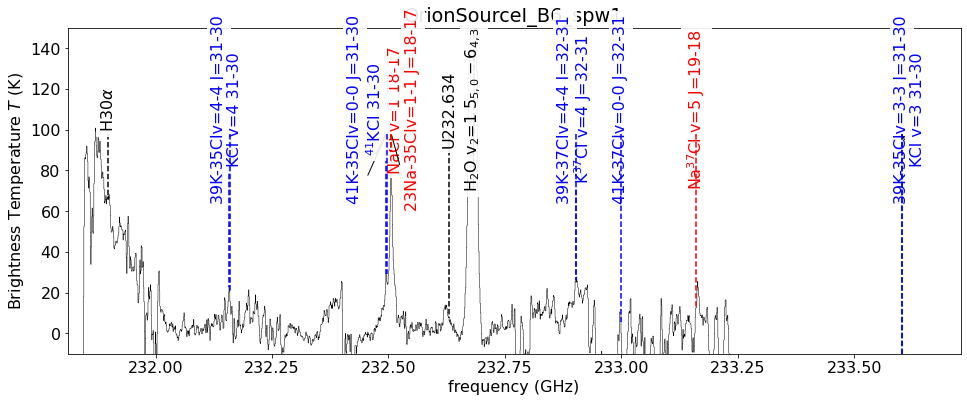

In [73]:
overplot_saltlines(stackspectra, vcen=vcen, savepath='spectra/figures', ymin=-10, ymax=150)

In [74]:
ls spectra/figures/

color_labels_OrionSourceI_B6_spw0.png
color_labels_OrionSourceI_B6_spw1.png
color_labels_OrionSourceI_B6_spw2.png
full_OrionSourceI_B6_spw0_lines_cutout_smaller_stack.pdf
full_OrionSourceI_B6_spw0_lines_cutout_smaller_stack.png
full_OrionSourceI_B6_spw1_lines_cutout_smaller_stack.pdf
full_OrionSourceI_B6_spw1_lines_cutout_smaller_stack.png
full_OrionSourceI_B6_spw2_lines_cutout_smaller_stack.pdf
full_OrionSourceI_B6_spw2_lines_cutout_smaller_stack.png
OrionSourceI_B6_spw0.png
OrionSourceI_B6_spw1.png
OrionSourceI_B6_spw2.png


In [75]:
from IPython.display import display, Image

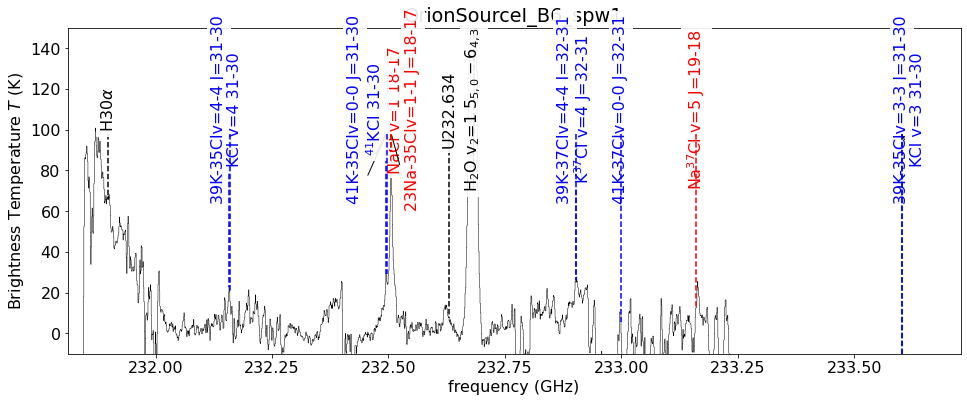

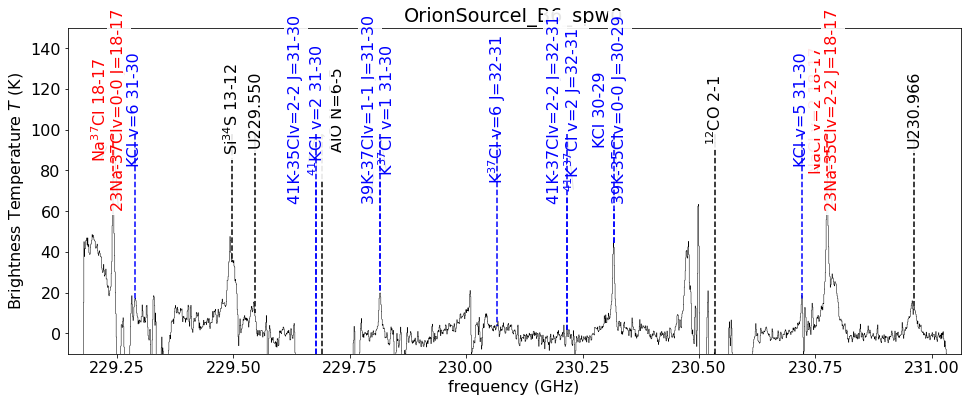

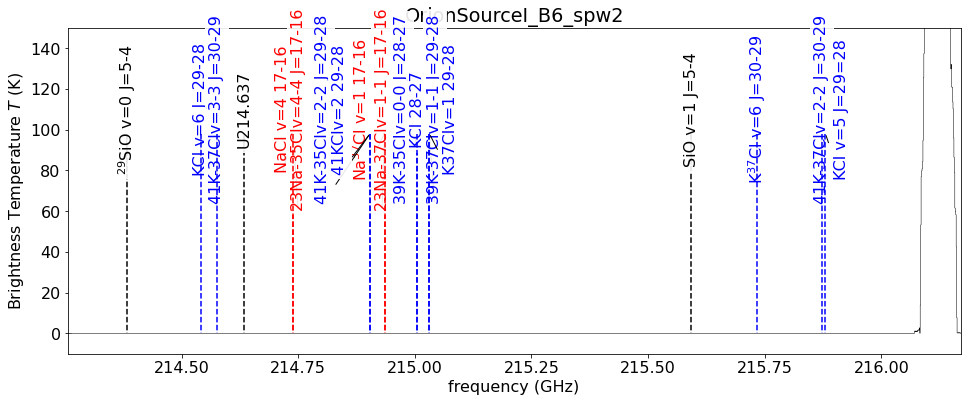

In [76]:
for fn in glob.glob('spectra/figures/color*.png'):
    display(Image(fn))

In [81]:
vmap.writeto(paths.dpath('disk_velocity_map.fits'))

In [77]:
paths.dpath('')

'/orange/adamginsburg/orion/2016.1.00165.S/FITS/'

In [ ]:
%run /orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis/stacked_line_search.py

In [ ]:
fullcube.identify_bad_beams(0.1).sum() / fullcube.shape[0]